# <center> YBLL Workshop Supervised Machine Learning </br>
## <center> Group 4
    
`Members`
* Christian Jay Baguio
* Jhibsam Palmes
* Chris Jallaine Mugot 
* Hans Christian Meneses
* Arielle Umali
* Erika C. Orquia
* Karel Kho Geraldizo
* Maria Daniela D. Velasco

# Imports

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#sklearn lib imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
breast_cancer = load_breast_cancer()
print("Features:", breast_cancer.feature_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
print("Targets:", breast_cancer.target_names)

Targets: ['malignant' 'benign']


In [14]:
bc_df = pd.DataFrame(np.c_[breast_cancer['data'], breast_cancer['target']],
                  columns= np.append(breast_cancer['feature_names'], ['target']))
bc_df
#0 indicates benign and 1 for malignant

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## `Data Preprocessing`

In [5]:
# Get information about the dataset
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
#checking null values
bc_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [22]:
#checking duplicated values
print(bc_df.duplicated().value_counts())

False    569
dtype: int64


## `🔎 Examine Dataset (EDA) `

### 🔎 Feature Understanding 

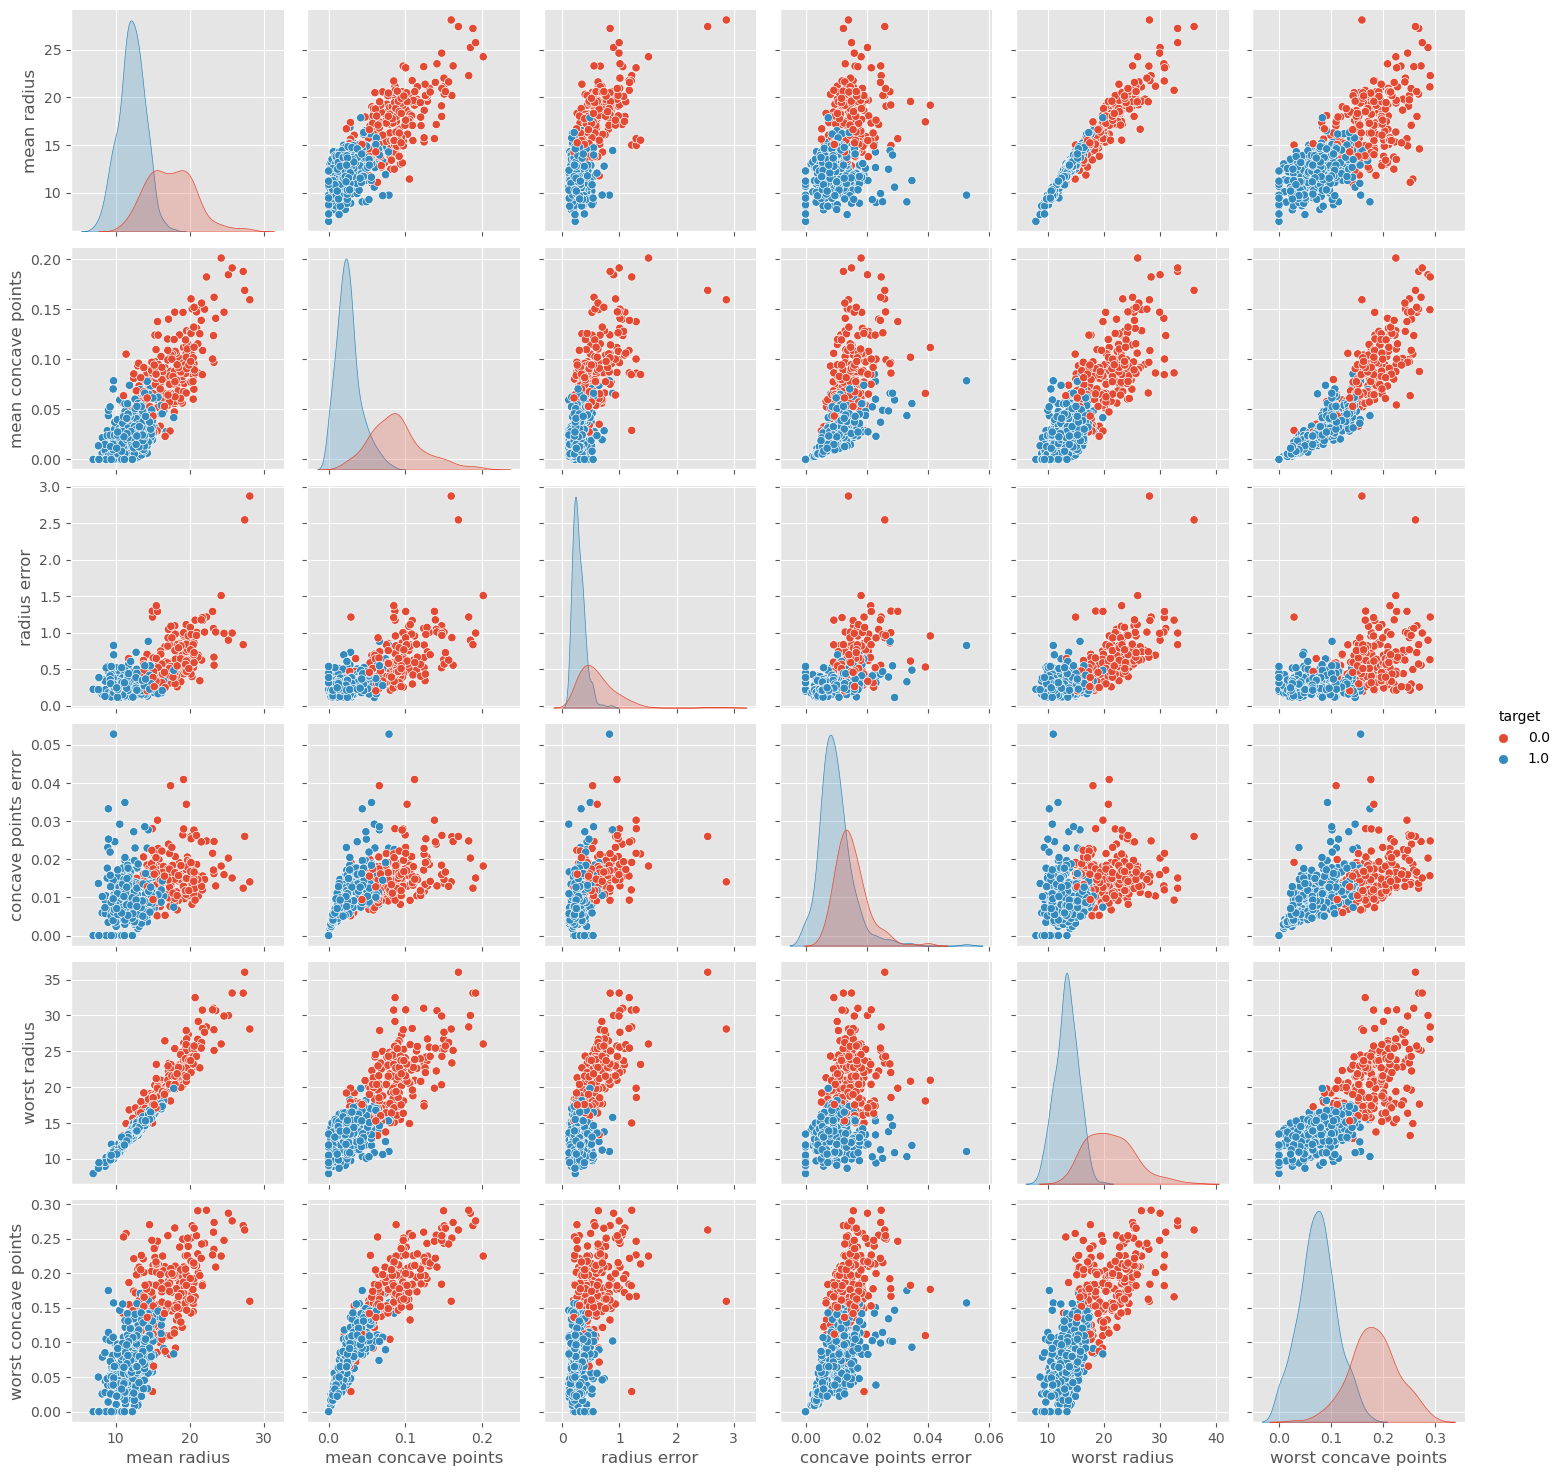

In [7]:
sns.pairplot(bc_df, vars =  ['mean radius', 'mean concave points', 'radius error', 'concave points error', 'worst radius', 'worst concave points'], hue = 'target')

<Axes: >

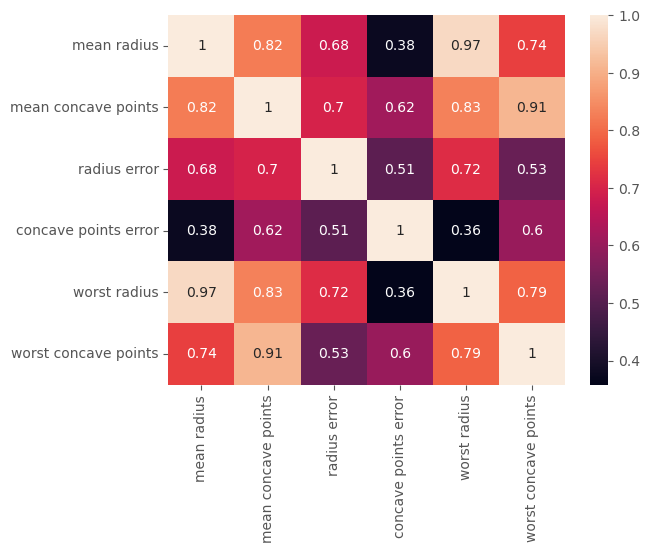

In [9]:
bc_corr = bc_df[['mean radius', 'mean concave points', 'radius error', 'concave points error', 'worst radius', 'worst concave points']].corr()
sns.heatmap(bc_corr, annot = True)

Text(0, 0.5, 'worst concave points')

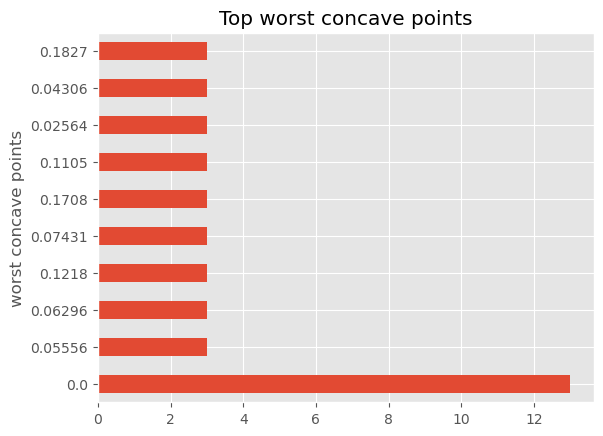

In [15]:
ax = bc_df["worst concave points"].value_counts().head(10).plot(kind = "barh", title ="Top 10 Worst Concave Points")
ax.set_ylabel('Worst Concave Points')

Text(0.5, 0, 'Worst Concave Points')

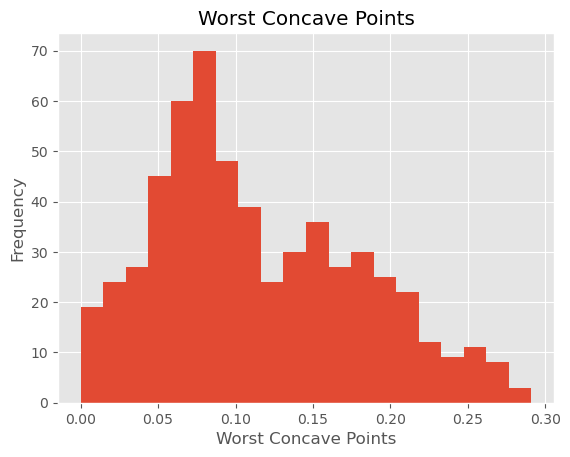

In [17]:
ax = bc_df["worst concave points"].plot(kind = "hist", bins = 20, title = "Worst Concave Points")
ax.set_xlabel("Worst Concave Points")

Text(0.5, 0, 'Worst Concave Points')

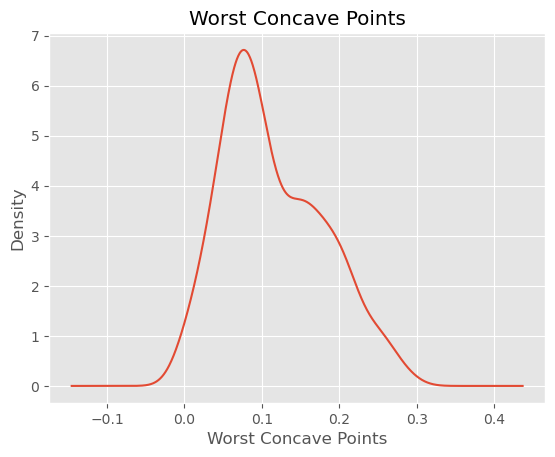

In [19]:
ax = bc_df["worst concave points"].plot(kind = "kde", title = "Worst Concave Points")
ax.set_xlabel("Worst Concave Points")

C:\Users\ATARA\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


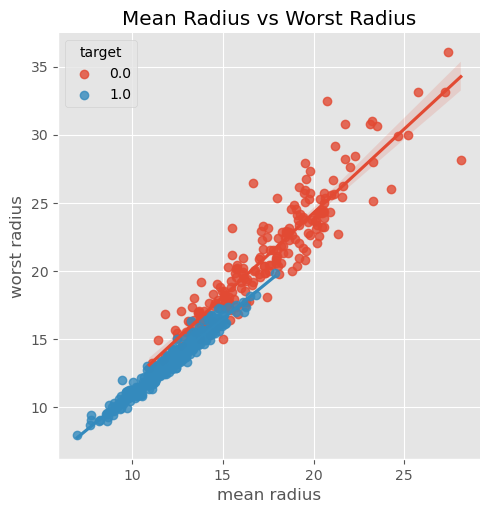

In [21]:
sns.lmplot(data=bc_df, x='mean radius',y='worst radius', hue='target',legend_out=False)
plt.title('Mean Radius vs Worst Radius')
plt.show()

## `Descriptive Statistics`

Summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [22]:
bc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# `Model preparation` 📈

### 📈 Set predictor and the target variables.

* Dependent Variable (Y) is the target or response variable having values like 0 or 1, Yes or No (for binary classification which is the use case for logistic regression)
* Independent Variable (X) is the predictor variable used to predict the target or response variable

In [46]:
#knn target and predictor var
knnX = bc_df[['mean radius', 'worst radius']]
knny = bc_df['target']

#logistic target and predictor var
logX = bc_df[['mean radius', 'worst radius']]
logy = bc_df['target']

### 📈 Prepare Train and test for Classification model algorithm.

In [74]:
#Train and test preparation for knn
knnX_train, knnX_test, knn_y_train, knn_y_test = tts(knnX, knny, train_size = 0.7, test_size = 0.3, random_state = 32) #set random state to 32

#Train and test preparation for logistic
logX_train, logX_test, log_y_train, log_y_test = tts(logX, logy, train_size = 0.7, test_size = 0.3, random_state = 32) #set random state to 32

### 📈 Applying Classification algorithm.

In [75]:
# creation of model
knn = KNeighborsClassifier(metric='euclidean') #set the metric to euclidean distance
#before setting number of neighbor, we must check for its best fit neighbor.

# Define a grid of hyperparameters to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=6, scoring='accuracy')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = tts(knnX, knny, test_size=0.2, random_state=42)

# Fit the grid search on the training data
grid_search.fit(knnX_train, knn_y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Evaluate the model on the validation set with the best hyperparameters
best_knn_model = grid_search.best_estimator_
y_val_pred = best_knn_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)

print(f'Best n_neighbors: {best_params["n_neighbors"]}')
print(f'Validation Accuracy: {accuracy}')

Best n_neighbors: 7
Validation Accuracy: 0.9736842105263158


In [76]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean') #we use the grid search cross val to get the best n_neighbor for this model
knn.fit(knnX_train, knn_y_train)# fit the model with data

#Logistic regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(logX_train, log_y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

### 📈 Model Predictions For Classification Model. 

In [77]:
knn_pred = knn.predict(knnX_test)
log_pred = model.predict(logX_test)

#check for prediction probability of the model
knn_pred_proba = knn.predict_proba(knnX_test)
log_pred_proba = model.predict_proba(logX_test)[:, 1]

print(f'knn predictions: \n', knn_pred)
print(f'\nLogistic Reg predictions: \n', log_pred)

knn predictions: 
 [1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1.]

Logistic Reg predictions: 
 [1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0

### 📈Calculate ROC-AUC score

In [78]:
fpr, tpr, thresholds = roc_curve(log_y_test, log_pred)
roc_auc = roc_auc_score(log_y_test, log_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9783549783549783


The ROC-AUC score for the logistic regression model is 97%. For this particular score, it is a reliably source to indicate that this is a good score.

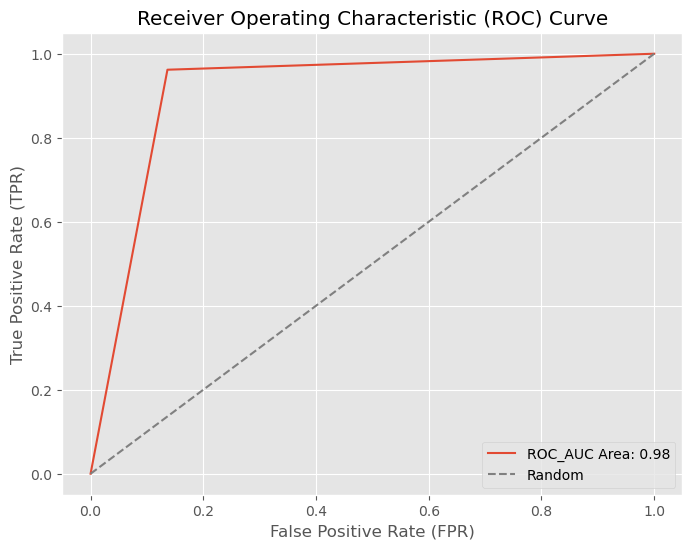

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC_AUC Area: {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In the graph shown above, this visually shows the precision and accuracy of the score above. What we can see here is that the curve is high, indicating that the performance of the model is good as the group anticipated. As the point stands, the precision and accuracy of the model's prediction with logistic regression is significantly preferable as it does  yield to giving accurate results on the predictions well.

### 📈 Classification Model Evaluations.

In [80]:
#function for model evaluation
def knn_model():
  print(f'Knn train score: ', knn.score(knnX_train, knn_y_train))
  print(f'Knn test score: ', knn.score(knnX_test, knn_y_test))
  print(f'Knn model accuracy: ', accuracy_score(knn_y_test, knn_pred))
def logi_model():
  print(f'Logistic train score: ', model.score(logX_train, log_y_train))
  print(f'Logistic test score: ', model.score(logX_test, log_y_test))
  print(f'Logistic model accuracy: ', accuracy_score(log_y_test, log_pred))

knn_model()
logi_model()

Knn train score:  0.9472361809045227
Knn test score:  0.8888888888888888
Knn model accuracy:  0.8888888888888888
Logistic train score:  0.9346733668341709
Logistic test score:  0.9239766081871345
Logistic model accuracy:  0.9239766081871345


### 📈 Evaluate Model Performance

* True Positive (TP): Instances that are actually positive and predicted as positive.
* True Negative (TN): Instances that are actually negative and predicted as negative.
* False Positive (FP): Instances that are actually negative but predicted as positive.
* False Negative (FN): Instances that are actually positive but predicted as negative.

`for knn:`</br>
 `|                 | Predicted Benign   | Predicted Malignant|` </br>
 `| Actual Benign   | True Benign: 54    | False Malignant: 12|` </br>
 `| Actual Malignant| False Benign: 7    | True Malignant: 98 |` </br>
 
 `for logistic:`</br>
 `|                 | Predicted Benign   | Predicted Malignant|` </br>
 `| Actual Benign   | True Benign: 57    | False Malignant: 9 |` </br>
 `| Actual Malignant| False Benign: 4    | True Malignant: 101|` </br>

In [81]:
#confusion matrix for knn model
print(f'Knn model confusion matrix: \n', confusion_matrix(knn_y_test, knn_pred))

#confusion matrix for Logistic model
print(f'\nLogistic model confusion matrix: \n', confusion_matrix(log_y_test, log_pred))

Knn model confusion matrix: 
 [[54 12]
 [ 7 98]]

Logistic model confusion matrix: 
 [[ 57   9]
 [  4 101]]


**Precision:**

Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of the positive predictions made by the model.</br>
`precision = true_positives / (true_positives + false_positives)`

**Recall (Sensitivity or True Positive Rate):**
Recall is the ratio of true positive predictions to the total actual positives. It measures the ability of the model to capture all the positive instances.</br>
`recall = true_positives / (true_positives + false_negatives)`

**F1-score:**
The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when there is an uneven class distribution. </br>
`f1_score = 2 * (precision * recall) / (precision + recall)`

**Support:**
Support is the number of actual occurrences of each class in the specified dataset. It is the number of true instances for each class.

In [83]:
#check classification report for each models
print(classification_report(knn_y_test, knn_pred)) #knn model
print(classification_report(log_y_test, log_pred)) #logistic model

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85        66
         1.0       0.89      0.93      0.91       105

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90        66
         1.0       0.92      0.96      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



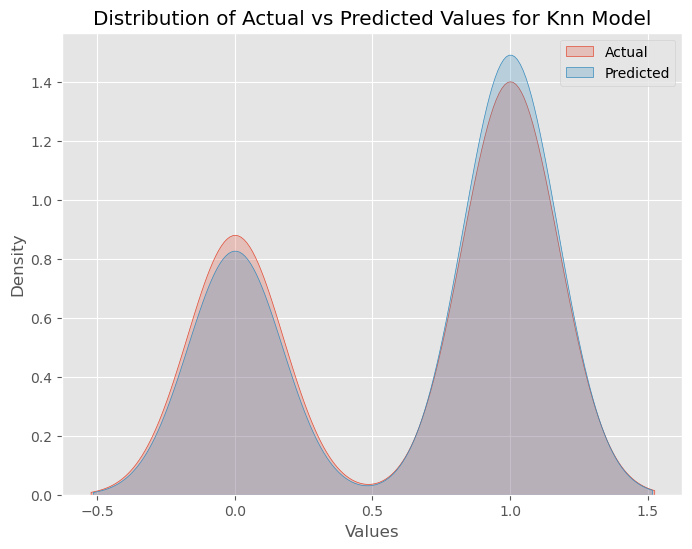

In [88]:
#Distribution plot
plt.figure(figsize=(8, 6))
sns.kdeplot(knn_y_test, label='Actual', fill=True)
sns.kdeplot(knn_pred, label='Predicted', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values for Knn Model')
plt.legend()
plt.show()

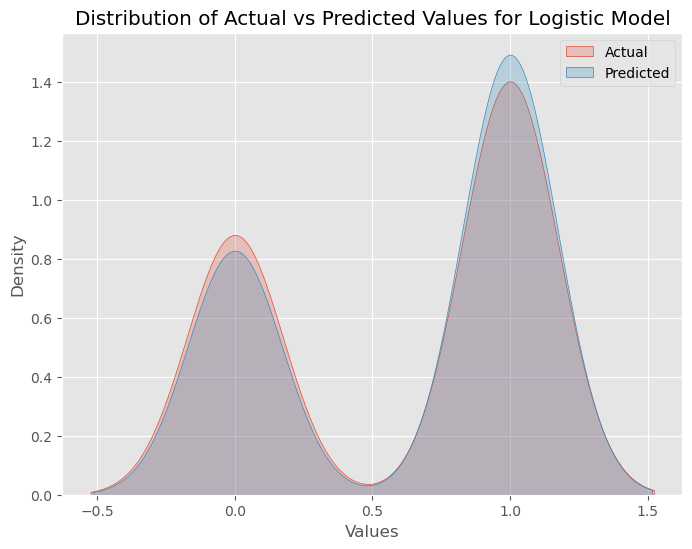

In [85]:
#Distribution plot
plt.figure(figsize=(8, 6))
sns.kdeplot(log_y_test, label='Actual', fill=True)
sns.kdeplot(log_pred, label='Predicted', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values for Logistic Model')
plt.legend()
plt.show()